In [65]:
import pandas as pd
import numpy as np
import string
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
import keras.utils as ku
from tensorflow.keras.optimizers import Adam

In [2]:
df=pd.read_csv("ArticlesApril2017.csv")

In [3]:
df.head()

,abstract,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,NaN,58def1347c459f24986d7c80,716,By STEPHEN HILTNER and SUSAN LEHMAN,article,Finding an Expansive View of a Forgotten Peop...,"['Photography', 'New York Times', 'Niger', 'Fe...",3,Insider,2,2017-04-01 00:15:41,Unknown,One of the largest photo displays in Times his...,The New York Times,News,https://www.nytimes.com/2017/03/31/insider/nig...
1,NaN,58def3237c459f24986d7c84,823,By GAIL COLLINS,article,"And Now, the Dreaded Trump Curse","['United States Politics and Government', 'Tru...",3,OpEd,23,2017-04-01 00:23:58,Unknown,Meet the gang from under the bus.,The New York Times,Op-Ed,https://www.nytimes.com/2017/03/31/opinion/and...
2,NaN,58def9f57c459f24986d7c90,575,By THE EDITORIAL BOARD,article,Venezuela’s Descent Into Dictatorship,"['Venezuela', 'Politics and Government', 'Madu...",3,Editorial,22,2017-04-01 00:53:06,Unknown,A court ruling annulling the legislature’s aut...,The New York Times,Editorial,https://www.nytimes.com/2017/03/31/opinion/ven...
3,NaN,58defd317c459f24986d7c95,1374,By MICHAEL POWELL,article,Stain Permeates Basketball Blue Blood,"['Basketball (College)', 'University of North ...",3,Sports,1,2017-04-01 01:06:52,College Basketball,"For two decades, until 2013, North Carolina en...",The New York Times,News,https://www.nytimes.com/2017/03/31/sports/ncaa...
4,NaN,58df09b77c459f24986d7ca7,708,By DEB AMLEN,article,Taking Things for Granted,['Crossword Puzzles'],3,Games,0,2017-04-01 02:00:14,Unknown,In which Howard Barkin and Will Shortz teach u...,The New York Times,News,https://www.nytimes.com/2017/03/31/crosswords/...


In [4]:
len(df.headline)

886

In [5]:
# Remove the unknown headline

In [6]:
all_headlines = []
all_headlines.extend(list(df.headline.values))

all_headlines = [h for h in all_headlines if h != "Unknown"]
len(all_headlines)

831

In [7]:
all_headlines

['Finding an Expansive View  of a Forgotten People in Niger',
 'And Now,  the Dreaded Trump Curse',
 'Venezuela’s Descent Into Dictatorship',
 'Stain Permeates Basketball Blue Blood',
 'Taking Things for Granted',
 'The Caged Beast Awakens',
 'An Ever-Unfolding Story',
 'O’Reilly Thrives as Settlements Add Up',
 'Mouse Infestation',
 'Divide in G.O.P. Now Threatens Trump Tax Plan',
 'Variety Puzzle: Acrostic',
 'They Can Hit a Ball 400 Feet. But Play Catch? That’s Tricky.',
 'In Trump Country, Shock at Trump Budget Cuts',
 'Why Is This Hate Different From All Other Hate?',
 'Pick Your Favorite Ethical Offender',
 'My Son’s Growing Black Pride',
 'Jerks and the Start-Ups They Ruin',
 'Trump  Needs  a Brain',
 'Manhood in the Age of Trump',
 'The Value of a Black College',
 'Initial Description',
 'Rough Estimates',
 'El Pasatiempo Nacional',
 'Cooling Off on a Hot Day at Yankee Stadium',
 'Trump’s Staff Mixed Politics and Paydays',
 'A Virtuoso Rebuilding Act Requires Everyone in Tune',

In [8]:
# 1. Cleaning of the dataset

In [9]:
def clean_text(txt):
    txt = "".join(v for v in txt if v not in string.punctuation).lower()
    txt = txt.encode("utf8").decode("ascii",'ignore')
    return txt

corpus = [clean_text(x) for x in all_headlines]
corpus[:10]

['finding an expansive view  of a forgotten people in niger',
 'and now  the dreaded trump curse',
 'venezuelas descent into dictatorship',
 'stain permeates basketball blue blood',
 'taking things for granted',
 'the caged beast awakens',
 'an everunfolding story',
 'oreilly thrives as settlements add up',
 'mouse infestation',
 'divide in gop now threatens trump tax plan']

In [10]:
# 2. Genearting sequence of Ngram tokens

In [11]:
''' Example : Ngram	Sequence of Tokens
i stand	[30, 507]
i stand with	[30, 507, 11]
i stand with the	[30, 507, 11, 1]
i stand with the shedevils	[30, 507, 11, 1, 975]'''

' Example : Ngram\tSequence of Tokens\ni stand\t[30, 507]\ni stand with\t[30, 507, 11]\ni stand with the\t[30, 507, 11, 1]\ni stand with the shedevils\t[30, 507, 11, 1, 975]'

In [12]:
tokenizer = Tokenizer()

def get_sequence_of_tokens(corpus):
    ## tokenization
    tokenizer.fit_on_texts(corpus)
    total_words = len(tokenizer.word_index) + 1

    ## convert data to sequence of tokens
    input_sequences = []
    for line in corpus:
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)
    return input_sequences, total_words

inp_sequences, total_words = get_sequence_of_tokens(corpus)
inp_sequences[:10]

[[169, 17],
 [169, 17, 665],
 [169, 17, 665, 367],
 [169, 17, 665, 367, 4],
 [169, 17, 665, 367, 4, 2],
 [169, 17, 665, 367, 4, 2, 666],
 [169, 17, 665, 367, 4, 2, 666, 170],
 [169, 17, 665, 367, 4, 2, 666, 170, 5],
 [169, 17, 665, 367, 4, 2, 666, 170, 5, 667],
 [6, 80]]

In [13]:
# [finding,an] - [169,17]
# [finding,an,expensive] - [169,17,665]
# [finding,an,expensive,view] - [169,17,665,367]
# [finding,an,expensive,view,of] - [169,17,665,367,4]
# .......continues

In [14]:
total_words # number of distinct words

2422

In [15]:
# word along with their index

In [16]:
# Get the word index dictionary from the tokenizer
word_index = tokenizer.word_index

# Display the word index dictionary
print("Word Index Dictionary:")
print(word_index)

# Alternatively, if you want to print each word along with its index separately
print("\nWord Indices:")
for word, index in word_index.items():
    print(f"'{word}': {index}")

Word Index Dictionary:
{'the': 1, 'a': 2, 'to': 3, 'of': 4, 'in': 5, 'and': 6, 'on': 7, 'for': 8, 'is': 9, 'trump': 10, 'new': 11, 'at': 12, 'what': 13, 'trumps': 14, 'with': 15, 'be': 16, 'an': 17, 'from': 18, 'season': 19, 'you': 20, 'how': 21, 'as': 22, 'episode': 23, 'us': 24, 'this': 25, 'it': 26, 'but': 27, 'its': 28, 'not': 29, 'york': 30, 'today': 31, 'that': 32, 'up': 33, 'good': 34, '3': 35, 'health': 36, 'who': 37, 'why': 38, 'all': 39, 'my': 40, 'when': 41, 'by': 42, 'can': 43, 'your': 44, '2': 45, 'have': 46, 'or': 47, 'out': 48, 'are': 49, 'syria': 50, 'plan': 51, 'about': 52, 'will': 53, 'questions': 54, 'tax': 55, '5': 56, 'could': 57, 'mr': 58, 'i': 59, 'war': 60, 'do': 61, 'heart': 62, 'over': 63, 'day': 64, 'no': 65, 'his': 66, 'love': 67, 'college': 68, 'house': 69, 'dont': 70, 'like': 71, 'recap': 72, 'our': 73, 'has': 74, 'days': 75, 'policy': 76, 'work': 77, 'better': 78, 'home': 79, 'now': 80, 'they': 81, 'going': 82, 'korea': 83, 'news': 84, 'back': 85, 'move':

In [17]:
# 3. Padding the Sequences and obtain Variables : Predictors and Target  Example
#PREDICTORS	                     LABEL
#they	                           are
#they are	                       learning
#they are learning	             data
#they are learning data	         science

In [18]:
def generate_padded_sequences(input_sequences):
    max_sequence_len = max([len(x) for x in input_sequences])
    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

    predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
    label = ku.to_categorical(label, num_classes=total_words)
    return predictors, label, max_sequence_len

predictors, label, max_sequence_len = generate_padded_sequences(inp_sequences)

In [19]:
predictors

array([[   0,    0,    0, ...,    0,    0,  169],
       [   0,    0,    0, ...,    0,  169,   17],
       [   0,    0,    0, ...,  169,   17,  665],
       ...,
       [   0,    0,    0, ...,   96, 2420,   57],
       [   0,    0,    0, ..., 2420,   57,  365],
       [   0,    0,    0, ...,   57,  365,   94]], dtype=int32)

In [20]:
predictors.shape # maximum length is 19 across the sentence means last one goes to the y variable hence 18 left

(4806, 18)

In [21]:
max_sequence_len

19

In [44]:
label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [33]:
label.shape   # one hot encoded vector for all 4806 doc

(4806, 2422)

In [42]:
np.where(label[0] == 1)[0]      # 17 is gone to y value as one hot encoded vector for 1st doc

array([17])

In [45]:
np.where(label[1] == 1)[0]        # 665 is gone to y value as one hot encoded vector for 2nd doc

array([665])

In [46]:
# 4. Build the LSTM RNN model

In [47]:
#Input Layer : Takes the sequence of words as input
#LSTM Layer : Computes the output using LSTM units. I have added 100 units in the layer, but this number can be fine tuned later.
#Dropout Layer : A regularisation layer which randomly turns-off the activations of some neurons in the LSTM layer. It helps in preventing over fitting. (Optional Layer)
#Output Layer : Computes the probability of the best possible next word as output

In [66]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)
history = model.fit(
    predictors,
    label,
    epochs=10,
    batch_size=64
)

Epoch 1/10
76/76 [==============================] - 67s 96ms/step - loss: 7.3971 - accuracy: 0.0335
Epoch 2/10
76/76 [==============================] - 9s 124ms/step - loss: 6.6035 - accuracy: 0.0543
Epoch 3/10
76/76 [==============================] - 9s 113ms/step - loss: 5.9342 - accuracy: 0.0818
Epoch 4/10
76/76 [==============================] - 7s 95ms/step - loss: 4.9015 - accuracy: 0.1486
Epoch 5/10
76/76 [==============================] - 9s 113ms/step - loss: 3.6709 - accuracy: 0.2622
Epoch 6/10
76/76 [==============================] - 8s 112ms/step - loss: 2.4895 - accuracy: 0.4671
Epoch 7/10
76/76 [==============================] - 7s 95ms/step - loss: 1.5728 - accuracy: 0.6617
Epoch 8/10
76/76 [==============================] - 9s 113ms/step - loss: 1.0058 - accuracy: 0.7849
Epoch 9/10
76/76 [==============================] - 7s 97ms/step - loss: 0.6903 - accuracy: 0.8566
Epoch 10/10
76/76 [==============================] - 8s 110ms/step - loss: 0.5195 - accuracy: 0.8881


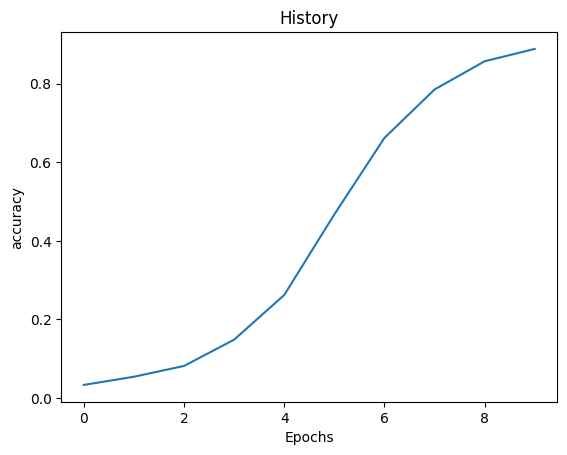

In [67]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title("History")
plt.xlabel("Epochs")
plt.ylabel('accuracy')
plt.show()

In [ ]:
# 5. Generating the text
#Great, our model architecture is now ready and we can train it using our data.
#Next lets write the function to predict the next word based on the input words (or seed text).
#We will first tokenize the seed text, pad the sequences and pass into the trained model to get predicted word.
#The multiple predicted words can be appended together to get predicted sequence.

In [68]:
def generate_text(seed_text, next_words, history, max_sequence_len):
    for _ in range(next_words):
        # Tokenize the seed_text
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        # Pad the token_list to match the maximum sequence length
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        # Predict the probabilities for each word
        predicted_probs = history.predict(token_list, verbose=0)[0]
        # Select the word with the highest probability as the predicted word
        predicted_index = np.argmax(predicted_probs)

        output_word = ""
        # Find the word corresponding to the predicted index
        for word, index in tokenizer.word_index.items():
            if index == predicted_index:
                output_word = word
                break
        # Append the predicted word to the seed_text for the next iteration
        seed_text += " " + output_word

    # Convert the generated text to title case and return
    return seed_text.title()

In [69]:
# 6. results

In [72]:
print (generate_text("united states", 5, model, max_sequence_len))
print (generate_text("donald trump", 4, model, max_sequence_len))
print (generate_text("india and china", 3, model, max_sequence_len))
print (generate_text("new york", 4, model, max_sequence_len))
print (generate_text("science and technology", 5, model, max_sequence_len))
print (generate_text("I love my", 3 , model, max_sequence_len))

United States Follow Money In Government Players
Donald Trump Bill Oreilly And Roger
India And China Mice In The
New York Today Sharing A Block
Science And Technology The Insufferability Of Fantasy Sports
I Love My Sublet And I
